# Разведочный анализ данных (Exploratory data analysis)

In [21]:
# отключаем вывод предупреждений
import warnings
warnings.filterwarnings('ignore')

In [22]:
# подключение диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [23]:
# подключение библиотек
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

In [24]:
# набор данных взят здесь: https://www.kaggle.com/uciml/pima-indians-diabetes-database
# загрузка данных
data = pd.read_csv('/content/gdrive/MyDrive/курсы/мфти/ИАДиНС/data/diabetes.csv', sep=',') 

In [25]:
data.head() # функция выводит первые 5 строк из набора данных, Outcome целевая переменна (наличие диабета)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Информация о наборе данных**

In [26]:
data.shape # размерность данных

(768, 9)

In [27]:
data.info() # информация о признаках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
data.describe().round(2) # Функция describe оценивает столбцы с числовым типом данных (int или float) и возвращает статистические данные, которые дают представление о распределении значений

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [29]:
data.duplicated().sum() # проверяем наличие дубликатов, в нашем случае в некоторых годах значения совпадают, но это не значит, что информация некорректна

0

In [30]:
data.drop_duplicates() # удаление дубликатов (data = data.drop_duplicates() для того чтобы применить изменения к набору данных)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#data.shape # размерность данных после удаления дубликатов

In [31]:
data.isna().sum() # количество пропущенных значений

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
corr = data.corr() # корреляция признаков
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Визуализации**

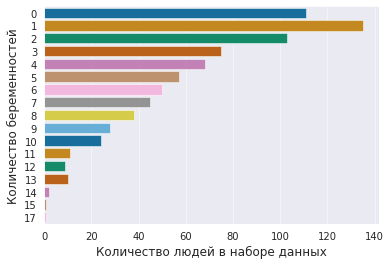

In [33]:
# соотношение между количеством беременностей в наборе данных
sns.set_style('darkgrid')
sns.countplot(y='Pregnancies',data=data,palette='colorblind')
plt.xlabel('Количество людей в наборе данных')
plt.ylabel('Количество беременностей')
plt.show()

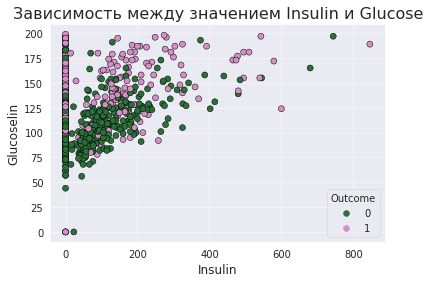

In [34]:
# Зависимость между значением уровня инсулина и уровнем сахара, Outcome целевая переменная (наличие диабета)
sns.set_style('darkgrid')
plt.title('Зависимость между значением Insulin и Glucose',size=16)
plt.xlabel('Insulin',size=12)
plt.ylabel('Glucoselin',size=12)
sns.scatterplot(x='Insulin', y='Glucose', data=data, hue='Outcome', edgecolor='black', palette='cubehelix', hue_order=[0,1])
plt.show()

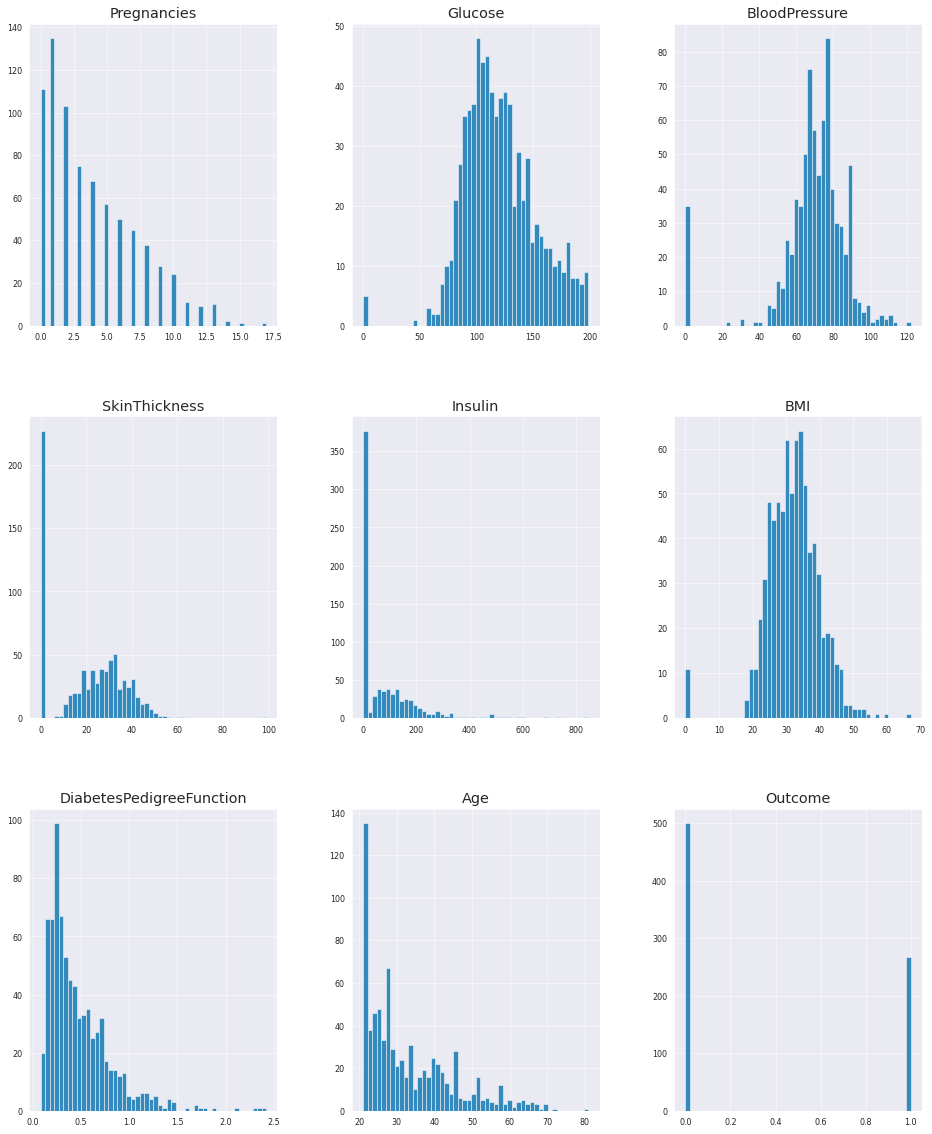

In [35]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # гистограммы распределения значений признаков

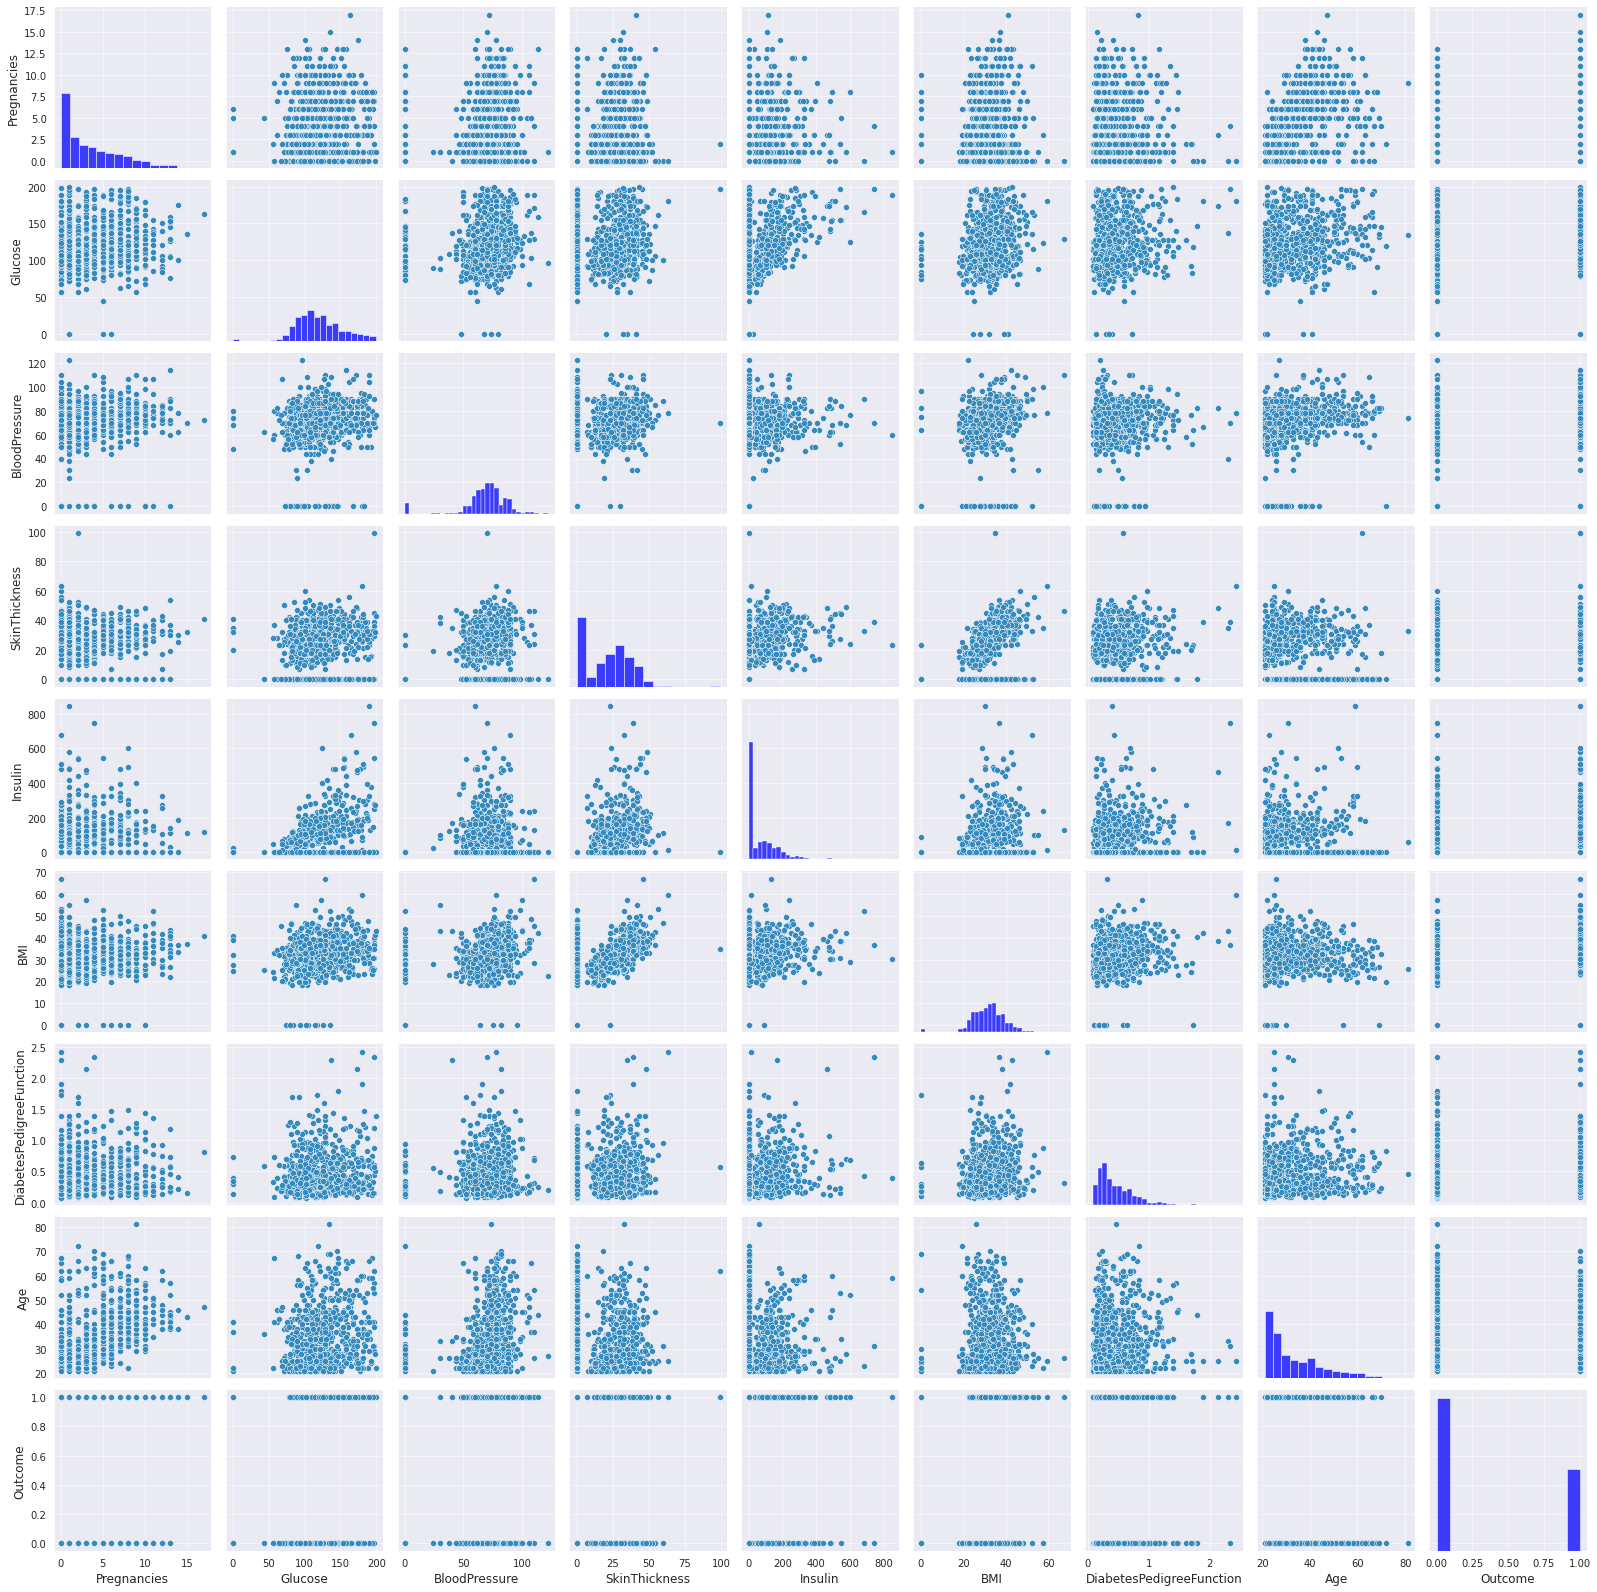

In [36]:
sns.pairplot(data) # показывает все парные и индивидуальные распределения

Pandas Profiling выдаёт в своём отчёте следующие параметры датасета:

* тип данных в каждой колонке;
* пропущенные и уникальные значения (количество и процент);
* описательную статистику: квартили, медиану, межквартильный размах, среднее, моду, абсолютное и относительное стандартное отклонение, медианное абсолютное отклонение, коэффициенты асимметрии и эксцесса;
* график в виде гистограммы;
* корреляции между значениями (Пирсона, Спирмена и Кендалла);
* матрицу пропущенных значений;
* анализ текста в категориальных значениях;
* а также метаданные файлов и изображений: размеры файлов, даты создания, высоту и ширину.

In [37]:
# установка pandas_profiling
!pip install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# использование pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(data)
profile
# Тоже самое можно посмотреть отдельными командами - это выгонее в плане ожидания и возможности выбирать, что именно смотреть/визуализировать

Output hidden; open in https://colab.research.google.com to view.

**Заключение** \
EDA, Exploratory Data Analysis или разведочный анализ данных — один из важнейших этапов проекта в области науки о данных. Он не только помогает определить направление проекта, но также помогает использовать набор данных наилучшим образом.